In [16]:
def beaksize(image,magn):
    magn = int(magn*50)
    from PIL import Image

    # Open the original image
    image = Image.open(image)

    # Get a box of the portion you want to magnify
    box = (447, 200, 480, 240+magn) # example box of 50x50 pixels
    portion = image.crop(box)

    # Resize the portion to double the size
    magnified = portion.resize((60+magn, 50+magn))

    # Paste the magnified portion back on to the original image
    image.paste(magnified, (447, 190))

    # Save the resulting image
    image.save("beak.jpg")
    

In [17]:
def ccolor(image,x):
    from PIL import Image
    import numpy as np
    import random
    import matplotlib as mpl
    import matplotlib.cm as cm
   
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    cmap = cm.hot
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    y = m.to_rgba(x)

    img = Image.open(image)
    img = img.convert("RGB")

    d = img.getdata()

    new_image = []
    for item in d:

        # change all white (also shades of whites)
        # pixels to yellow
        if item[0] not in list(range(200, 256)) and item[0] not in list(range(0,80)):
            new_image.append(tuple([np.uint8(i*255) for i in y]))
        else:
            new_image.append(item)

    # update image data
    img.putdata(new_image)

    # save new image
    img.save("colored.jpg")

In [18]:
def size(image,mag):
    in_mag = mag
    mag = int((1-mag)*(-50))
    from PIL import Image, ImageFilter

    # Open the original image
    image = Image.open(image)

    # Get a box of the portion you want to magnify
    box = (228, 390, 450, 464)
    portion = image.crop(box)
    if(in_mag < 0.4):
        portion = portion.filter(ImageFilter.GaussianBlur(radius=1))

    # Resize the portion to double the size
    magnified = portion.resize((int(500+2*mag), int(200+2*mag)))
    

    # Paste the magnified portion back on to the original image
    image.paste(magnified, (180, 330-mag))

    # Save the resulting image
    image.save("sized.jpg")
    



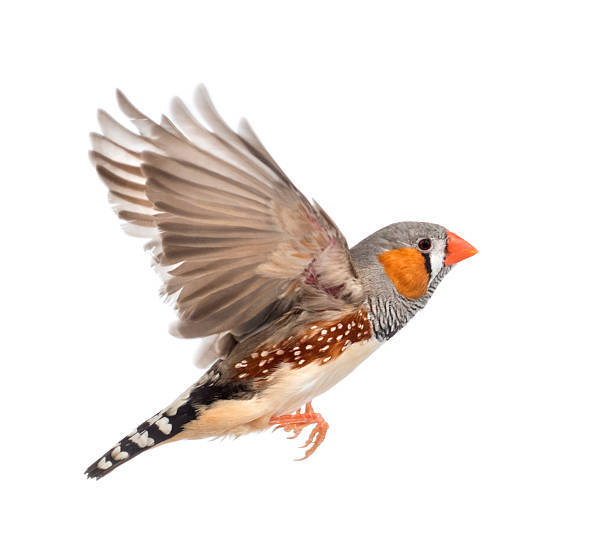

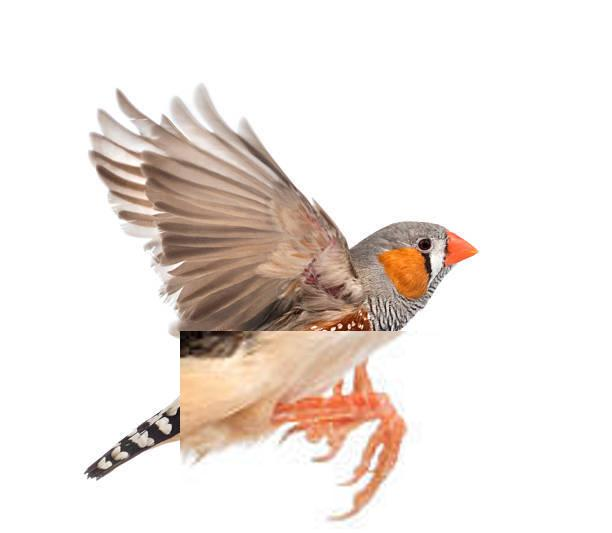

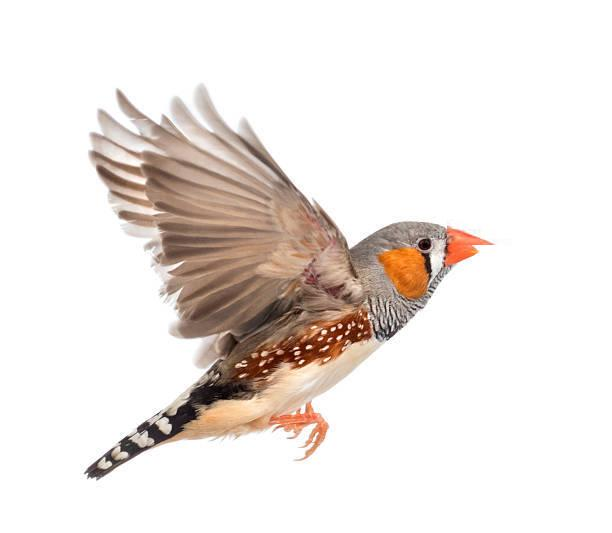

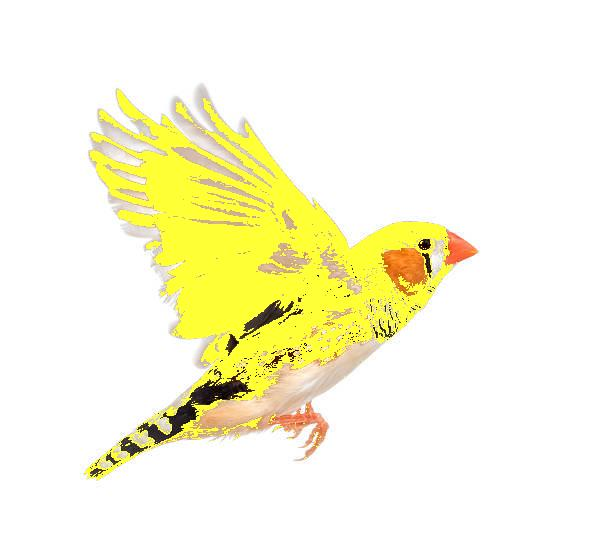

In [20]:
size("bird.jpeg",0.98)
ccolor("bird.jpeg",0.8)
beaksize("bird.jpeg",0.1)
from IPython.display import Image, display

listOfImageNames = ['bird.jpeg',"sized.jpg","beak.jpg","colored.jpg"]

for imageName in listOfImageNames:
    display(Image(filename=imageName))